#  Assignment 3

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|. | | |
|  | |. |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='link to your selfie'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# Pandas assignment

## [Part one](http://nbviewer.jupyter.org/url/maartenmarx.nl/teaching/ISatWork/Assignments/ASSIGNMENTS/baseball.ipynb)

Copy and paste the exrcises from this file into this notebook, and put your answers behind each question.

## Part two: American baby names

We continue the analysis of American baby names started in <http://maartenmarx.nl/teaching/ISatWork/Slides/Week1_slides.ipynb#Chapter-2:-analyse-baby-names>

You must copy some of the pandas commands from the slides to get started. Do that here too. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 1
In 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.

#### Problem 1(a)
Load in these CSV files from the Sean Lahman's Baseball Database. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas DataFrame and show the head of each table.

Hint Use the requests, StringIO and zipfile modules to get from the web.

Hint 2 A local copy is available in the Data folder of our course.

In [40]:
#Part 1:
import StringIO
import requests
#Problem 1a:
url = "https://github.com/ndevisscher/Data-Science/blob/master/Week%203/Salaries.csv"
r = requests.get(url).content
#s = pd.read_csv(StringIO.StringIO(r))
s = pd.read_csv('Salaries.csv')
s.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [41]:
t = pd.read_csv('Teams.csv')
t.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [39]:
#Question 1b:
summary = s.groupby(['teamID', 'yearID']).sum()
summary.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

### Problem 1(c)
Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

Hint: Merge the DataFrames using teamID and yearID.

In [67]:
#Question 1c:
#The wins per team per year
teams = t.loc[:,['yearID', 'teamID', 'W']]
#The salary per player per year
salaries = s.loc[:,['yearID', 'teamID', 'salary']]
#Sum of the salary per team per year
sumsalary = salaries.groupby(['teamID', 'yearID']).sum().reset_index()
#Joining the teamwins and salary
merge = pd.merge(teams, sumsalary, on=['yearID', 'teamID'], how='inner')
#Grouping by teamID and showing statistics per year
organized = join.groupby(['teamID', 'yearID']).sum()
organized.head()

W    salary
teamID yearID              
ANA    1997    84  31135472
       1998    85  41281000
       1999    70  55388166
       2000    82  51464167
       2001    75  47535167

### Problem 1(d)
How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end?

Hints: Use a for loop to consider multiple years. Use the teamID (three letter representation of the team name) to save space on the plot.

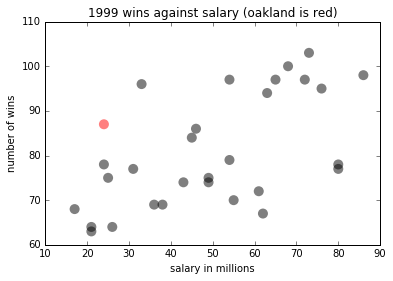

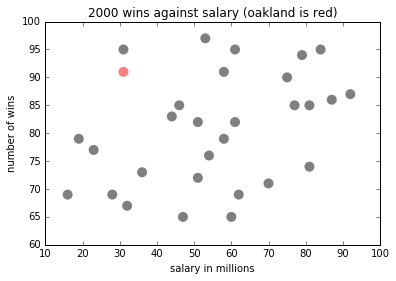

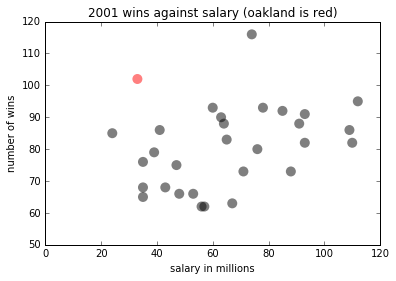

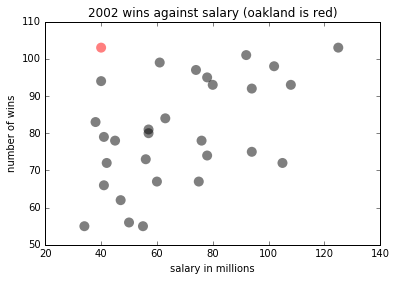

In [146]:
#Question 1d:
#Make the data usable for the plots
data = organized.reset_index()
#Get the data for a given year
for year in range(1999,2003):
    year_data = data[data.yearID==year]
    win_data = year_data['W']
    salary_data = year_data['salary']
    team_data = year_data['teamID']
    #Make a plot for the year
    Xaxis = np.divide(salary_data.values, 1000000)
    Yaxis = win_data.values
    different_color = ['red' if team=='OAK' else 'black' for team in team_data.values]

    plt.scatter(Xaxis,Yaxis, c=different_color, s=100, alpha=0.5, edgecolors='none')
    plt.title(str(year) + ' wins against salary (oakland is red)')    
    plt.xlabel('salary in millions')
    plt.ylabel('number of wins')
    plt.figure()


plt.show()

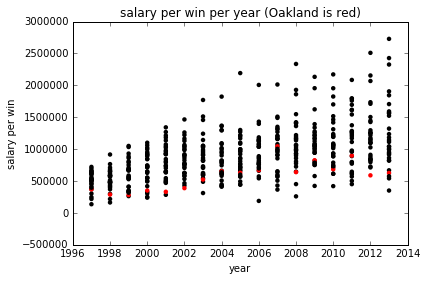

In [122]:
#Question 1d:
#Make the data usable for the plots
data = organized.reset_index()
#Get the data for a given year
for year in range(1997,2014):
    year_data = data[data.yearID==year]
    for item in year_data.values:
        team = item[0]
        oak = year_data[year_data.teamID==team]
        win_data = oak['W']
        salary_data = oak['salary']
        salary_per_win = np.divide(salary_data,win_data)
        team_data = year_data['teamID']
        Xaxis = year
        Yaxis = salary_per_win
        if team=='OAK':
            plt.scatter(Xaxis,Yaxis, c='red', edgecolors='none')
        else:
            plt.scatter(Xaxis,Yaxis, c='black', edgecolors='none')

plt.title('salary per win per year (Oakland is red)')    
plt.xlabel('year')
plt.ylabel('salary per win')
plt.show()

## N1

* Vind voor elke naam het totaal aantal jongens en het totaal aantal meisjes met die naam (totalen dus genomen over alle jaren)
* Dit is natuurlijk weer een pivot table
* We willen ook de totalen erbij
* Orden de namen omgekeerd op het aantal keer dat ze voorkomen

Je tabel moet er zo uitzien:
* kolommen: sex	F	M	All
* Rijen: ALL, gevolgd door de namen, 

```
sex	F	M	All
name			
All	159990140	162412587	322402727
James	23044	5049727	5072771
John	21578	5040319	5061897
Robert	20055	4767995	4788050
Michael	21470	4243903	4265373
```


# N2

* Now we want to find the most gender ambiguous names.
* How can we do that? An intuitive measure is to take the logarithm of the number of males divided by the number of females. 
    * If it is close to 0, the name is very ambiguous
    * if it is negative, it is a more femalish name
    * if it is positive it is a more malish name
    * if we take logarithm with base 2, then a value of $+n$, for a name $N$, means that $N$ is used $2^n$ more often for males than for females. E.g., for $n=4$, this means 16 times. 
   
### Your task
* Add a column `ratio` to your just created dataframe in which you divide the male by the female totals
* Using `np.log` and pandas `apply` method (and possibly $\lambda$ abstraction), compute the log measure.
* Print out the top 20 most ambiguous names. Take those names with a "log-value" between $-0.1$ and $0.1$ and sort them reversely on the total number of babies with that name.



# N3

* We now want a dataframe containing non-ambiguous names.
* Do two things.

1. Add a column `gender` to your dataframe in which you store the winning gender.
2. Restrict the dataframe to those names which occur at least 10.000 times and are used at least 16 times more for one gender than for the other.
    * How many names are left?
    * How many males and how many females?
3. Store this as a csv file.
3. Suppose we classify all children with the names from this csv file according to the gender column. Clearly we make some mistakes then (that is, for example  a boy named Sue is classified as a girl). Calculate the expected maximum percentage of mistakes, and also calculated the actual percentage of mistakes.

